In [ ]:
# Data exploration - loading data
import pandas as pd
import numpy as np
from datetime import datetime

print("DATA EXPLORATION")
print("=" * 50)

print("Loading datasets")
limits_df = pd.read_csv('../../tglab/limits.csv')
sessions_df = pd.read_csv('../../tglab/session data.csv')
transactions_df = pd.read_csv('../../tglab/Transaction History.csv')
betting_df = pd.read_csv('../../tglab/Betting Activity.csv')
players_df = pd.read_csv('../../tglab/players data.csv')


print(f"\nDATASET SIZES:")
print(f"- Limits: {len(limits_df):,} records")
print(f"- Sessions: {len(sessions_df):,} records") 
print(f"- Transactions: {len(transactions_df):,} records")
print(f"- Betting: {len(betting_df):,} records")
print(f"- Players: {len(players_df):,} records")

DATA EXPLORATION
Loading datasets

DATASET SIZES:
- Limits: 3,272,586 records
- Sessions: 8,675,703 records
- Transactions: 2,487,635 records
- Betting: 32,695,066 records
- Players: 1,131,256 records


In [ ]:
# column exploration
print("\nCOLUMN ANALYSIS")
print("=" * 50)

datasets = {
    'LIMITS': limits_df,
    'SESSIONS': sessions_df, 
    'TRANSACTIONS': transactions_df,
    'BETTING': betting_df,
    'PLAYERS': players_df
}

for name, df in datasets.items():
    print(f"\n{name}.CSV COLUMNS ({len(df.columns)} total):")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col}")
    
    print(f"\n{name} DATA TYPES:")
    for col, dtype in df.dtypes.items():
        print(f"   {col:25s} -> {dtype}")
    
    print(f"\n{name} SAMPLE DATA:")
    print(df.head(2))
    print("-" * 60)


COLUMN ANALYSIS

LIMITS.CSV COLUMNS (5 total):
    1. user_id
    2. limit_type
    3. limit_value
    4. limit_set_timestamp
    5. limit_breach_events

LIMITS DATA TYPES:
   user_id                   -> int64
   limit_type                -> object
   limit_value               -> float64
   limit_set_timestamp       -> object
   limit_breach_events       -> object

LIMITS SAMPLE DATA:
   user_id limit_type  limit_value  limit_set_timestamp  limit_breach_events
0   796797       loss    3000000.0  2023-01-27 00:00:00  2023-01-27 00:00:00
1   796797       loss   20000000.0  2023-01-27 00:00:00  2023-01-27 00:00:00
------------------------------------------------------------

SESSIONS.CSV COLUMNS (7 total):
    1. user_id
    2. session_start_timestamp
    3. session_end_timestamp
    4. total_session_duration
    5. games_played
    6. device_type_browser
    7. gsd.TokenId

SESSIONS DATA TYPES:
   user_id                   -> int64
   session_start_timestamp   -> object
   session_end_

In [ ]:
# Time range analysis
print("\nTIME RANGE ANALYSIS")
print("=" * 50)

def analyze_timestamps(df, name):
    timestamp_cols = []
    
    for col in df.columns:
        if any(keyword in col.lower() for keyword in ['time', 'date', 'timestamp']):
            timestamp_cols.append(col)
    
    print(f"\n{name} TIMESTAMP COLUMNS:")
    if not timestamp_cols:
        print("   No timestamp columns found")
        return
    
    for col in timestamp_cols:
        print(f"\n{col}:")
        try:
            dates = pd.to_datetime(df[col], errors='coerce')
            valid_dates = dates.dropna()
            
            if len(valid_dates) > 0:
                print(f"      Range: {valid_dates.min()} to {valid_dates.max()}")
                print(f"      Valid entries: {len(valid_dates):,} / {len(df):,} ({len(valid_dates)/len(df):.1%})")
                
                years = valid_dates.dt.year.value_counts().sort_index()
                if len(years) > 1:
                    print(f"      Year distribution:")
                    for year, count in years.head(10).items():
                        print(f"        {year}: {count:,} records")
            else:
                print(f"      No valid dates found")
                print(f"      Sample values: {df[col].dropna().head(3).tolist()}")
                
        except Exception as e:
            print(f"      Error analyzing: {e}")
            print(f"      Sample values: {df[col].dropna().head(3).tolist()}")

# Analyze each dataset
for name, df in datasets.items():
    analyze_timestamps(df, name)


TIME RANGE ANALYSIS

LIMITS TIMESTAMP COLUMNS:

limit_set_timestamp:
      Range: 1970-01-01 00:00:00 to 2025-08-01 11:53:15
      Valid entries: 3,272,586 / 3,272,586 (100.0%)
      Year distribution:
        1970: 1,508 records
        2021: 202 records
        2022: 173 records
        2023: 910,018 records
        2024: 952,851 records
        2025: 1,407,834 records

SESSIONS TIMESTAMP COLUMNS:

session_start_timestamp:
      Range: 2025-01-01 00:00:00 to 2025-08-01 11:35:29
      Valid entries: 8,675,703 / 8,675,703 (100.0%)

session_end_timestamp:
      Range: 2025-01-01 00:00:03 to 2025-08-01 11:35:30
      Valid entries: 8,675,703 / 8,675,703 (100.0%)

TRANSACTIONS TIMESTAMP COLUMNS:

timestamp:
      Range: 2025-01-01 00:00:01 to 2025-08-01 11:57:20
      Valid entries: 2,487,635 / 2,487,635 (100.0%)

BETTING TIMESTAMP COLUMNS:

bet_timestamp:
      Range: 2025-01-01 00:00:33 to 2025-08-01 10:59:28
      Valid entries: 32,695,066 / 32,695,066 (100.0%)

PLAYERS TIMESTAMP COLU

In [ ]:
# Key field analysis
print("\nKEY FIELD ANALYSIS")
print("=" * 50)

print("\nUSER ID ANALYSIS:")
for name, df in datasets.items():
    user_cols = [col for col in df.columns if 'user' in col.lower()]
    if user_cols:
        for col in user_cols:
            unique_users = df[col].nunique()
            total_records = len(df)
            print(f"   {name:12s} -> {col:15s}: {unique_users:,} unique users, {total_records:,} records")

print("\nLIMIT TYPES ANALYSIS:")
if 'limit_type' in limits_df.columns:
    print("   Limit types available:")
    limit_counts = limits_df['limit_type'].value_counts()
    for limit_type, count in limit_counts.items():
        print(f"      {limit_type:15s}: {count:,} records")

print("\nTRANSACTION TYPES:")
if 'transaction_type' in transactions_df.columns:
    trans_counts = transactions_df['transaction_type'].value_counts()
    for trans_type, count in trans_counts.items():
        print(f"      {trans_type:15s}: {count:,} records")

print("\nBETTING OUTCOMES:")
outcome_cols = [col for col in betting_df.columns if 'outcome' in col.lower()]
if outcome_cols:
    for col in outcome_cols:
        outcome_counts = betting_df[col].value_counts()
        print(f"   {col}:")
        for outcome, count in outcome_counts.head().items():
            print(f"      {outcome:15s}: {count:,} records")


KEY FIELD ANALYSIS

USER ID ANALYSIS:
   LIMITS       -> user_id        : 1,114,916 unique users, 3,272,586 records
   SESSIONS     -> user_id        : 253,645 unique users, 8,675,703 records
   TRANSACTIONS -> user_id        : 246,472 unique users, 2,487,635 records
   BETTING      -> user_id        : 127,487 unique users, 32,695,066 records
   PLAYERS      -> user_id        : 1,131,256 unique users, 1,131,256 records

LIMIT TYPES ANALYSIS:
   Limit types available:
      deposit        : 3,258,713 records
      loss           : 9,076 records
      time           : 4,797 records

TRANSACTION TYPES:
      deposit        : 2,021,918 records
      withdrawal     : 465,717 records

BETTING OUTCOMES:
   outcome:
      loss           : 23,432,272 records
      win            : 9,262,794 records


In [ ]:
# Target creation feasibility
print("\nTARGET CREATION FEASIBILITY")
print("=" * 50)

print("\nLIMIT BREACH ANALYSIS:")
if 'limit_breach_events' in limits_df.columns:
    breach_data = limits_df['limit_breach_events'].dropna()
    print(f"   Records with breach events: {len(breach_data):,} / {len(limits_df):,} ({len(breach_data)/len(limits_df):.1%})")
    
    if len(breach_data) > 0:
        print(f"   Sample breach values: {breach_data.head(3).tolist()}")
        
        try:
            breach_dates = pd.to_datetime(breach_data, errors='coerce')
            valid_breaches = breach_dates.dropna()
            if len(valid_breaches) > 0:
                print(f"   Breach date range: {valid_breaches.min()} to {valid_breaches.max()}")
        except:
            print("   Could not parse breach events as dates")
else:
    print("   No 'limit_breach_events' column found")

print("\nDATA OVERLAP ANALYSIS:")
user_sets = {}
for name, df in datasets.items():
    user_cols = [col for col in df.columns if 'user' in col.lower()]
    if user_cols:
        user_col = user_cols[0]
        user_sets[name] = set(df[user_col].dropna())

if len(user_sets) > 1:
    print("   User overlap between datasets:")
    names = list(user_sets.keys())
    for i in range(len(names)):
        for j in range(i+1, len(names)):
            overlap = len(user_sets[names[i]].intersection(user_sets[names[j]]))
            total_unique = len(user_sets[names[i]].union(user_sets[names[j]]))
            print(f"      {names[i]} ∩ {names[j]}: {overlap:,} users ({overlap/total_unique:.1%} overlap)")




TARGET CREATION FEASIBILITY

LIMIT BREACH ANALYSIS:
   Records with breach events: 3,272,586 / 3,272,586 (100.0%)
   Sample breach values: ['2023-01-27 00:00:00', '2023-01-27 00:00:00', '2023-01-22 00:00:00']
   Breach date range: 2021-03-11 00:00:00 to 2025-08-04 04:07:25

DATA OVERLAP ANALYSIS:
   User overlap between datasets:
      LIMITS ∩ SESSIONS: 253,520 users (22.7% overlap)
      LIMITS ∩ TRANSACTIONS: 246,358 users (22.1% overlap)
      LIMITS ∩ BETTING: 127,393 users (11.4% overlap)
      LIMITS ∩ PLAYERS: 1,114,916 users (98.6% overlap)
      SESSIONS ∩ TRANSACTIONS: 209,506 users (72.1% overlap)
      SESSIONS ∩ BETTING: 83,586 users (28.1% overlap)
      SESSIONS ∩ PLAYERS: 253,645 users (22.4% overlap)
      TRANSACTIONS ∩ BETTING: 112,268 users (42.9% overlap)
      TRANSACTIONS ∩ PLAYERS: 246,472 users (21.8% overlap)
      BETTING ∩ PLAYERS: 127,487 users (11.3% overlap)


In [ ]:
# Filtering data

limits_2025 = limits_df[
    (limits_df['limit_set_timestamp'] >= '2025-01-01') & 
    (limits_df['limit_set_timestamp'] <= '2025-08-01')
]

print(f"Original limits: {len(limits_df):,}")
print(f"2025 limits: {len(limits_2025):,}")
print(f"Reduction: {(1 - len(limits_2025)/len(limits_df))*100:.1f}%")

#re-run overlap analysis with filtered data
users_with_limits_2025 = set(limits_2025.user_id.unique())
users_with_betting = set(betting_df.user_id.unique())
users_with_sessions = set(sessions_df.user_id.unique())

overlap_betting = users_with_limits_2025 & users_with_betting
overlap_sessions = users_with_limits_2025 & users_with_sessions

print(f"\nNEW OVERLAPS:")
print(f"Limits ∩ Betting: {len(overlap_betting):,} users ({len(overlap_betting)/len(users_with_limits_2025)*100:.1f}%)")
print(f"Limits ∩ Sessions: {len(overlap_sessions):,} users ({len(overlap_sessions)/len(users_with_limits_2025)*100:.1f}%)")

Original limits: 3,272,586
2025 limits: 1,405,185
Reduction: 57.1%

NEW OVERLAPS:
Limits ∩ Betting: 88,271 users (19.0%)
Limits ∩ Sessions: 197,748 users (42.6%)


In [13]:
#Understand who sets limits but doesn't bet
limits_without_bets = limits_2025[~limits_2025.user_id.isin(betting_df.user_id)]

print("Limit types for users WITHOUT betting data:")
print(limits_without_bets['limit_type'].value_counts())
print("\nLimit types for users WITH betting data:")
print(limits_2025[limits_2025.user_id.isin(betting_df.user_id)]['limit_type'].value_counts())

#Check if these are preemptive limits set at registration
limits_2025_merged = limits_2025.merge(
    players_df[['user_id', 'account_creation_date']], 
    on='user_id', 
    how='left'
)
limits_2025_merged['days_after_registration'] = (
    pd.to_datetime(limits_2025_merged['limit_set_timestamp']) - 
    pd.to_datetime(limits_2025_merged['account_creation_date'])
).dt.days

print("\nDays from registration to limit setting:")
print(limits_2025_merged.groupby(limits_2025_merged.user_id.isin(betting_df.user_id))['days_after_registration'].describe())

Limit types for users WITHOUT betting data:
limit_type
deposit    1130144
loss          2770
time          1565
Name: count, dtype: int64

Limit types for users WITH betting data:
limit_type
deposit    266983
loss         2490
time         1233
Name: count, dtype: int64

Days from registration to limit setting:
             count      mean        std  min  25%  50%  75%     max
user_id                                                            
False    1134479.0  0.642779  17.114994 -1.0  0.0  0.0  0.0  1495.0
True      270706.0  5.337787  50.179057 -1.0  0.0  0.0  0.0  1583.0


In [ ]:
# Creating new target: predict who will set loss limits

loss_limit_users = limits_2025[limits_2025['limit_type'] == 'loss']['user_id'].unique()
print(f"Loss limit users: {len(loss_limit_users)}")

# Checking overlap with betting data
loss_limit_with_betting = set(loss_limit_users) & set(betting_df.user_id.unique())
print(f"Loss limit users with betting data: {len(loss_limit_with_betting)} ({len(loss_limit_with_betting)/len(loss_limit_users)*100:.1f}%)")

# Creating new target: predict who will set loss limits
all_betting_users = betting_df.user_id.unique()
target = pd.Series(
    index=all_betting_users,
    data=[1 if uid in loss_limit_users else 0 for uid in all_betting_users]
)
print(f"Target distribution: {target.value_counts()}")
print(f"Positive rate: {target.mean()*100:.2f}%")

Loss limit users: 1774
Loss limit users with betting data: 845 (47.6%)
Target distribution: 0    126642
1       845
Name: count, dtype: int64
Positive rate: 0.66%


User Lifecycle Stats:
count    127487.000000
mean         34.314424
std          55.996573
min           0.000000
25%           0.000000
50%           2.000000
75%          46.000000
max         212.000000
Name: days_active, dtype: float64


C:\Users\natan\AppData\Local\Temp\ipykernel_32000\185017296.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_first_week = betting_df.groupby('user_id').apply(


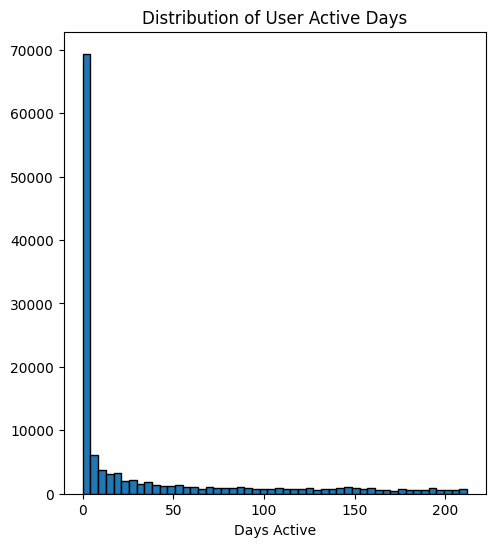

In [ ]:
# User lifecycle analysis

# Key questions:
# - How long do users typically stay active?
# - Is there a danger period where risk escalates?
# - Do users show patterns before dropping off?

import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

betting_df['bet_timestamp'] = pd.to_datetime(betting_df['bet_timestamp'])

user_first_last = betting_df.groupby('user_id')['bet_timestamp'].agg(['min', 'max'])
user_first_last['days_active'] = (user_first_last['max'] - user_first_last['min']).dt.days

print("User Lifecycle Stats:")
print(user_first_last['days_active'].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(user_first_last['days_active'], bins=50, edgecolor='black')
plt.title('Distribution of User Active Days')
plt.xlabel('Days Active')

# Cohort analysis - do early behaviors predict longevity?
user_first_week = betting_df.groupby('user_id').apply(
    lambda x: x[x['bet_timestamp'] <= x['bet_timestamp'].min() + timedelta(days=7)]
)

In [16]:

# Harvard markers - understand what "normal" vs "risky" looks like

# Betting frequency patterns
daily_bets_per_user = betting_df.groupby(['user_id', pd.to_datetime(betting_df['bet_timestamp']).dt.date]).size()

# Looking for acceleration patterns
def analyze_betting_trajectory(user_bets):
    """Analyze how betting behavior changes over time"""
    if len(user_bets) < 14:
        return None
    
    weeks = []
    for week in range(len(user_bets) // 7):
        week_data = user_bets.iloc[week*7:(week+1)*7]
        weeks.append({
            'week': week,
            'daily_avg': week_data.mean(),
            'daily_max': week_data.max(),
            'variance': week_data.std()
        })
    
    return pd.DataFrame(weeks)

# Sample analysis
sample_users = daily_bets_per_user.index.get_level_values(0).unique()[:100]
trajectories = []
for user in sample_users:
    user_daily = daily_bets_per_user[user]
    traj = analyze_betting_trajectory(user_daily)
    if traj is not None:
        trajectories.append(traj)

In [17]:
# Loss-chasing detection

# How do users behave after big losses?
betting_df_sorted = betting_df.sort_values(['user_id', 'bet_timestamp'])

# Identify "big losses" (top 10% of loss amounts)
losses_only = betting_df[betting_df['outcome'] == 'loss']
big_loss_threshold = losses_only['bet_amount'].quantile(0.9)

# What happens after a big loss?
post_loss_behavior = []
for user in betting_df['user_id'].unique()[:1000]:
    user_bets = betting_df_sorted[betting_df_sorted['user_id'] == user].reset_index(drop=True)
    big_losses = user_bets[(user_bets['outcome'] == 'loss') & (user_bets['bet_amount'] > big_loss_threshold)]
    
    for idx in big_losses.index:
        if idx + 5 < len(user_bets):  # Look at next 5 bets
            next_bets = user_bets.iloc[idx+1:idx+6]
            post_loss_behavior.append({
                'user_id': user,
                'loss_amount': user_bets.iloc[idx]['bet_amount'],
                'avg_next_5_bets': next_bets['bet_amount'].mean(),
                'max_next_5_bets': next_bets['bet_amount'].max(),
                'time_to_next_bet': (pd.to_datetime(next_bets.iloc[0]['bet_timestamp']) - 
                                   pd.to_datetime(user_bets.iloc[idx]['bet_timestamp'])).total_seconds() / 60
            })

post_loss_df = pd.DataFrame(post_loss_behavior)
print("\nPost-Big-Loss Behavior:")
print(post_loss_df.describe())


Post-Big-Loss Behavior:
            user_id   loss_amount  avg_next_5_bets  max_next_5_bets  \
count  1.806610e+05  1.806610e+05     1.806610e+05     1.806610e+05   
mean   1.408683e+06  5.850494e+04     1.853761e+04     6.022429e+04   
std    2.254815e+05  9.725395e+04     3.558038e+04     1.121539e+05   
min    7.621610e+05  1.200002e+04     0.000000e+00     0.000000e+00   
25%    1.252015e+06  2.000000e+04     5.316032e+03     2.000000e+04   
50%    1.395577e+06  3.200000e+04     1.000382e+04     3.114200e+04   
75%    1.536069e+06  5.000000e+04     2.000715e+04     5.129872e+04   
max    1.947343e+06  4.000000e+06     1.840058e+06     5.000000e+06   

       time_to_next_bet  
count     180661.000000  
mean         136.895870  
std         1807.067750  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max       210838.266667  


In [18]:
# Harvard research emphasizes session variance as key marker

session_stats = sessions_df.groupby('user_id').agg({
    'total_session_duration': ['count', 'mean', 'std', 'min', 'max'],
    'games_played': ['mean', 'std']
})

# When do risky sessions happen?
sessions_df['hour'] = pd.to_datetime(sessions_df['session_start_timestamp']).dt.hour
sessions_df['dayofweek'] = pd.to_datetime(sessions_df['session_start_timestamp']).dt.dayofweek

# Late night gambling correlation with risk?
late_night_sessions = sessions_df[sessions_df['hour'].between(0, 6)]
print(f"Late night sessions: {len(late_night_sessions) / len(sessions_df) * 100:.1f}%")

# Session intensity - games per minute
sessions_df['games_per_minute'] = sessions_df['games_played'] / (sessions_df['total_session_duration'] / 60 + 1)

Late night sessions: 38.6%


In [19]:
# Identifying natural risk clusters
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm

# For a sample of users, calculating multiple risk dimensions
risk_profiles = []
sample_users = betting_df['user_id'].unique()[:5000]

for user in tqdm(sample_users):
    profile = {'user_id': user}
    
    # Betting dimension
    user_bets = betting_df[betting_df['user_id'] == user]
    profile['total_bets'] = len(user_bets)
    profile['avg_bet'] = user_bets['bet_amount'].mean()
    profile['loss_rate'] = (user_bets['outcome'] == 'loss').mean()
    profile['total_loss'] = user_bets[user_bets['outcome'] == 'loss']['bet_amount'].sum()
    
    # Session dimension
    user_sessions = sessions_df[sessions_df['user_id'] == user]
    if len(user_sessions) > 0:
        profile['avg_session_duration'] = user_sessions['total_session_duration'].mean()
        profile['session_variance'] = user_sessions['total_session_duration'].std()
    
    # Transaction dimension  
    user_trans = transactions_df[transactions_df['user_id'] == user]
    deposits = user_trans[user_trans['transaction_type'] == 'deposit']
    if len(deposits) > 0:
        profile['deposit_count'] = len(deposits)
        profile['avg_deposit'] = deposits['amount'].mean()
    
    risk_profiles.append(profile)

risk_df = pd.DataFrame(risk_profiles)

# Look for natural clusters
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare for clustering
numeric_cols = [col for col in risk_df.columns if col != 'user_id']
risk_df_filled = risk_df[numeric_cols].fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(risk_df_filled)

# Find risk clusters
kmeans = KMeans(n_clusters=5, random_state=42)
risk_df['cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
for cluster in range(5):
    cluster_data = risk_df[risk_df['cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} users):")
    print(cluster_data[numeric_cols].mean())

100%|██████████| 5000/5000 [03:57<00:00, 21.06it/s]



Cluster 0 (2354 users):
total_bets              9.697944e+02
avg_bet                 4.792348e+03
loss_rate               8.802306e-01
total_loss              3.415433e+06
avg_session_duration    9.065627e+02
session_variance        4.326638e+03
deposit_count           3.756846e+01
avg_deposit             2.699611e+04
dtype: float64

Cluster 1 (2209 users):
total_bets              1.687017e+03
avg_bet                 8.743344e+03
loss_rate               5.923544e-01
total_loss              6.794125e+06
avg_session_duration    7.274655e+02
session_variance        1.635437e+03
deposit_count           2.130311e+01
avg_deposit             4.457236e+04
dtype: float64

Cluster 2 (300 users):
total_bets              1.475835e+04
avg_bet                 1.372451e+04
loss_rate               7.087614e-01
total_loss              8.640824e+07
avg_session_duration    8.591496e+02
session_variance        5.991828e+03
deposit_count           2.478567e+02
avg_deposit             6.020848e+04
dtype: f

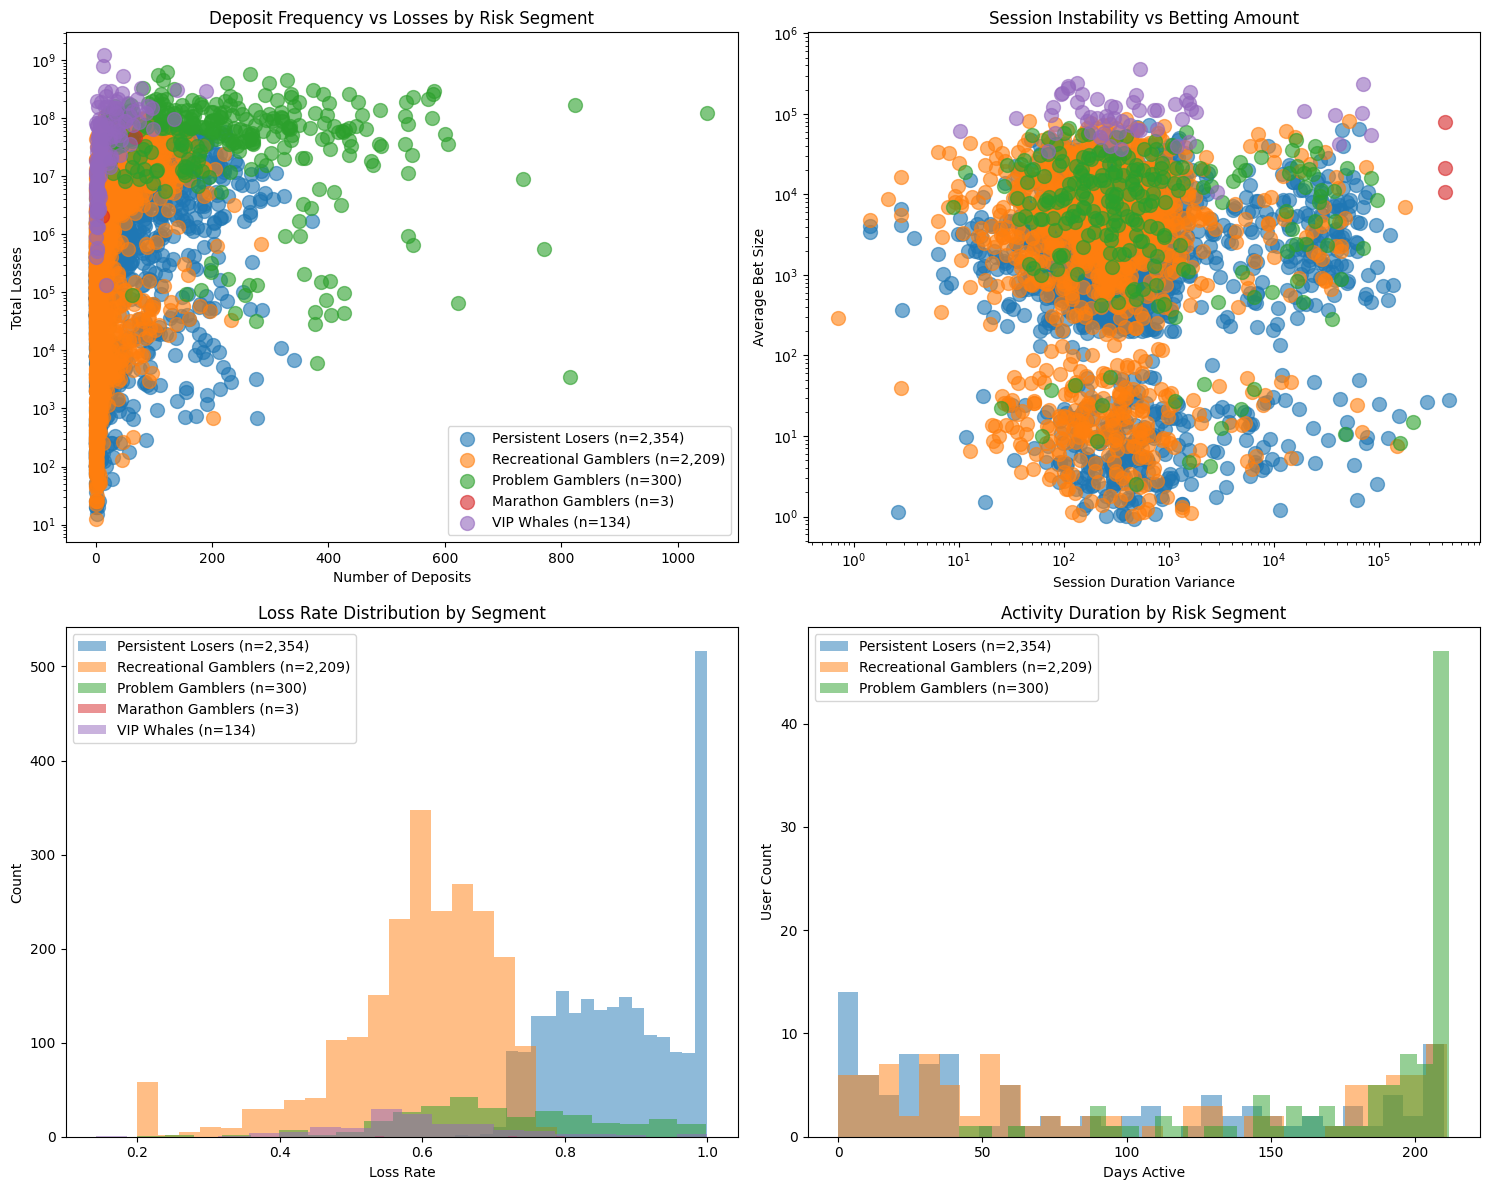

In [20]:
# Visualizing the clusters with better labels
cluster_names = {
    0: "Persistent Losers (n=2,354)",
    1: "Recreational Gamblers (n=2,209)", 
    2: "Problem Gamblers (n=300)",
    3: "Marathon Gamblers (n=3)",
    4: "VIP Whales (n=134)"
}

# Create risk score based on cluster characteristics
risk_scores = {
    0: 3,  # High risk - constant losses
    1: 1,  # Low risk - recreational
    2: 5,  # HIGHEST risk - all indicators
    3: 4,  # High risk - extreme sessions
    4: 2   # Medium risk - can afford losses
}

# Visualizing cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Total Loss vs Deposit Count
ax = axes[0, 0]
for cluster in range(5):
    cluster_data = risk_df[risk_df['cluster'] == cluster]
    ax.scatter(cluster_data['deposit_count'], 
               cluster_data['total_loss'],
               label=cluster_names[cluster],
               s=100, alpha=0.6)
ax.set_xlabel('Number of Deposits')
ax.set_ylabel('Total Losses')
ax.set_title('Deposit Frequency vs Losses by Risk Segment')
ax.legend()
ax.set_yscale('log')

# Plot 2: Session Variance vs Avg Bet
ax = axes[0, 1]
for cluster in range(5):
    cluster_data = risk_df[risk_df['cluster'] == cluster]
    ax.scatter(cluster_data['session_variance'].fillna(0), 
               cluster_data['avg_bet'],
               label=cluster_names[cluster],
               s=100, alpha=0.6)
ax.set_xlabel('Session Duration Variance')
ax.set_ylabel('Average Bet Size')
ax.set_title('Session Instability vs Betting Amount')
ax.set_xscale('log')
ax.set_yscale('log')

# Plot 3: Loss Rate Distribution
ax = axes[1, 0]
for cluster in range(5):
    cluster_data = risk_df[risk_df['cluster'] == cluster]
    ax.hist(cluster_data['loss_rate'], bins=20, alpha=0.5, label=cluster_names[cluster])
ax.set_xlabel('Loss Rate')
ax.set_ylabel('Count')
ax.set_title('Loss Rate Distribution by Segment')
ax.legend()

# Plot 4: Risk Timeline
ax = axes[1, 1]
# For each cluster, show when users typically become active
for cluster in [0, 1, 2]:  # Focus on main clusters
    cluster_users = risk_df[risk_df['cluster'] == cluster]['user_id'].values[:100]
    cluster_lifecycles = user_first_last[user_first_last.index.isin(cluster_users)]['days_active']
    ax.hist(cluster_lifecycles, bins=30, alpha=0.5, label=cluster_names[cluster])
ax.set_xlabel('Days Active')
ax.set_ylabel('User Count')
ax.set_title('Activity Duration by Risk Segment')
ax.legend()

plt.tight_layout()
plt.show()

In [22]:
def extract_harvard_risk_features(user_id, betting_df, sessions_df, transactions_df):
    user_bets = betting_df[betting_df.user_id == user_id].copy()
    user_sessions = sessions_df[sessions_df.user_id == user_id].copy()
    user_trans = transactions_df[transactions_df.user_id == user_id].copy()
    
    if len(user_bets) == 0:
        return None
        
    user_bets['timestamp'] = pd.to_datetime(user_bets['bet_timestamp'])
    user_bets['hour'] = user_bets['timestamp'].dt.hour
    user_bets['date'] = user_bets['timestamp'].dt.date
    
    features = {'user_id': user_id}
    
    # 1. week 1 spike detection
    first_bet = user_bets['timestamp'].min()
    week_0_bets = user_bets[user_bets['timestamp'] < first_bet + timedelta(days=7)]
    week_1_bets = user_bets[(user_bets['timestamp'] >= first_bet + timedelta(days=7)) & 
                             (user_bets['timestamp'] < first_bet + timedelta(days=14))]
    
    if len(week_0_bets) > 0 and len(week_1_bets) > 0:
        features['week1_spike_ratio'] = len(week_1_bets) / len(week_0_bets)
        features['week1_amount_spike'] = week_1_bets['bet_amount'].mean() / (week_0_bets['bet_amount'].mean() + 1)
    else:
        features['week1_spike_ratio'] = 1
        features['week1_amount_spike'] = 1
    
    # 2. late night gambling pattern
    features['late_night_pct'] = (user_bets['hour'].between(0, 6)).mean()
    
    # Late night trend (does it decrease over time?)
    if len(user_bets) > 20:
        early_bets = user_bets.iloc[:len(user_bets)//2]
        late_bets = user_bets.iloc[len(user_bets)//2:]
        features['late_night_trend'] = (late_bets['hour'].between(0, 6)).mean() - (early_bets['hour'].between(0, 6)).mean()
    else:
        features['late_night_trend'] = 0
    
    # 3. LOSS CHASING (0 minute median)
    losses = user_bets[user_bets['outcome'] == 'loss'].copy()
    if len(losses) > 5:
        # Time to next bet after loss
        loss_gaps = []
        for idx in losses.index[:-1]:
            if idx + 1 in user_bets.index:
                time_gap = (user_bets.loc[idx + 1, 'timestamp'] - user_bets.loc[idx, 'timestamp']).total_seconds() / 60
                loss_gaps.append(time_gap)
        
        if loss_gaps:
            features['median_loss_gap_minutes'] = np.median(loss_gaps)
            features['pct_immediate_rebet'] = sum(g < 1 for g in loss_gaps) / len(loss_gaps)
        else:
            features['median_loss_gap_minutes'] = 999
            features['pct_immediate_rebet'] = 0
    else:
        features['median_loss_gap_minutes'] = 999
        features['pct_immediate_rebet'] = 0
    
    # 4. intensity metrics
    features['total_bets'] = len(user_bets)
    features['avg_daily_bets'] = user_bets.groupby('date').size().mean()
    features['max_daily_bets'] = user_bets.groupby('date').size().max()
    features['betting_days'] = user_bets['date'].nunique()
    features['avg_bet_amount'] = user_bets['bet_amount'].mean()
    
    # 5. session variance (from Harvard research)
    if len(user_sessions) > 1:
        features['session_duration_cv'] = user_sessions['total_session_duration'].std() / (user_sessions['total_session_duration'].mean() + 1)
    else:
        features['session_duration_cv'] = 0
    
    # 6. deposit patterns
    if len(user_trans) > 0:
        deposits = user_trans[user_trans['transaction_type'] == 'deposit']
        features['deposit_count'] = len(deposits)
        features['avg_deposit'] = deposits['amount'].mean() if len(deposits) > 0 else 0
    else:
        features['deposit_count'] = 0
        features['avg_deposit'] = 0
    
    # 7. financial stress indicators
    features['total_wagered'] = user_bets['bet_amount'].sum()
    features['total_lost'] = user_bets[user_bets['outcome'] == 'loss']['bet_amount'].sum()
    features['loss_rate'] = (user_bets['outcome'] == 'loss').mean()
    features['net_position'] = (user_bets[user_bets['outcome'] == 'win']['payout_amount'].sum() - 
                                features['total_wagered'])
    
    return features

# Create feature dataset
print("EXTRACTING FEATURES FOR ALL USERS...")
all_features = []

# Use your discovered clusters as labels!
labeled_users = risk_df[risk_df['cluster'].isin([1, 2])].copy()  # Recreational vs Problem
labeled_users['is_problem'] = (labeled_users['cluster'] == 2).astype(int)

for _, row in tqdm(labeled_users.iterrows(), total=len(labeled_users)):
    features = extract_harvard_risk_features(row['user_id'], betting_df, sessions_df, transactions_df)
    if features:
        features['is_problem'] = row['is_problem']
        all_features.append(features)

feature_df = pd.DataFrame(all_features)
print(f"\nFeatures extracted for {len(feature_df)} users")
print(f"Problem gamblers: {feature_df['is_problem'].sum()} ({feature_df['is_problem'].mean()*100:.1f}%)")

# Quick validation of our key discoveries
print("\nVALIDATING KEY PATTERNS:")
print("="*50)
problem_stats = feature_df[feature_df['is_problem'] == 1].mean()
recreational_stats = feature_df[feature_df['is_problem'] == 0].mean()

key_metrics = ['week1_spike_ratio', 'late_night_pct', 'median_loss_gap_minutes', 
               'deposit_count', 'avg_bet_amount', 'session_duration_cv']

for metric in key_metrics:
    if metric in feature_df.columns:
        ratio = problem_stats[metric] / (recreational_stats[metric] + 0.001)
        print(f"{metric:25} Problem: {problem_stats[metric]:8.2f} | Recreational: {recreational_stats[metric]:8.2f} | Ratio: {ratio:.2f}x")

EXTRACTING FEATURES FOR ALL USERS...


100%|██████████| 2509/2509 [02:41<00:00, 15.51it/s]


Features extracted for 2509 users
Problem gamblers: 300.0 (12.0%)

VALIDATING KEY PATTERNS:
week1_spike_ratio         Problem:     1.93 | Recreational:     1.45 | Ratio: 1.33x
late_night_pct            Problem:     0.34 | Recreational:     0.39 | Ratio: 0.87x
median_loss_gap_minutes   Problem:    51.64 | Recreational:   437.28 | Ratio: 0.12x
deposit_count             Problem:   247.86 | Recreational:    20.74 | Ratio: 11.95x
avg_bet_amount            Problem: 13724.51 | Recreational:  8743.34 | Ratio: 1.57x
session_duration_cv       Problem:     2.76 | Recreational:     0.85 | Ratio: 3.26x


c:\Users\natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


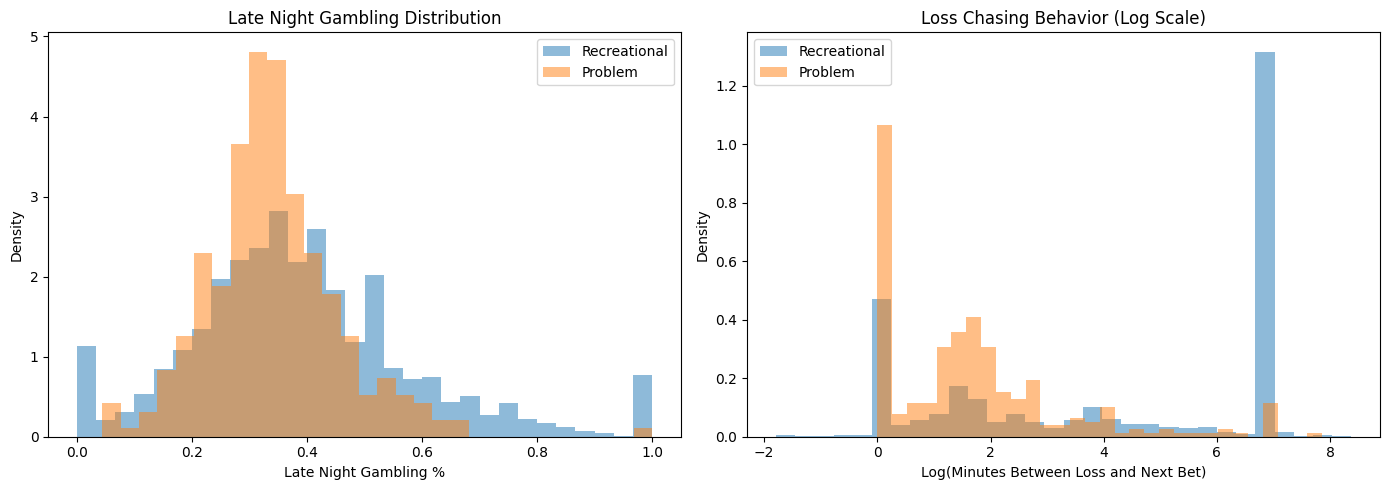

In [23]:
#Late-night pattern
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(feature_df[feature_df['is_problem']==0]['late_night_pct'], bins=30, alpha=0.5, label='Recreational', density=True)
ax1.hist(feature_df[feature_df['is_problem']==1]['late_night_pct'], bins=30, alpha=0.5, label='Problem', density=True)
ax1.set_xlabel('Late Night Gambling %')
ax1.set_ylabel('Density')
ax1.set_title('Late Night Gambling Distribution')
ax1.legend()

# Loss gap distribution
ax2.hist(np.log1p(feature_df[feature_df['is_problem']==0]['median_loss_gap_minutes']), bins=30, alpha=0.5, label='Recreational', density=True)
ax2.hist(np.log1p(feature_df[feature_df['is_problem']==1]['median_loss_gap_minutes']), bins=30, alpha=0.5, label='Problem', density=True)
ax2.set_xlabel('Log(Minutes Between Loss and Next Bet)')
ax2.set_ylabel('Density')
ax2.set_title('Loss Chasing Behavior (Log Scale)')
ax2.legend()
plt.tight_layout()
plt.show()

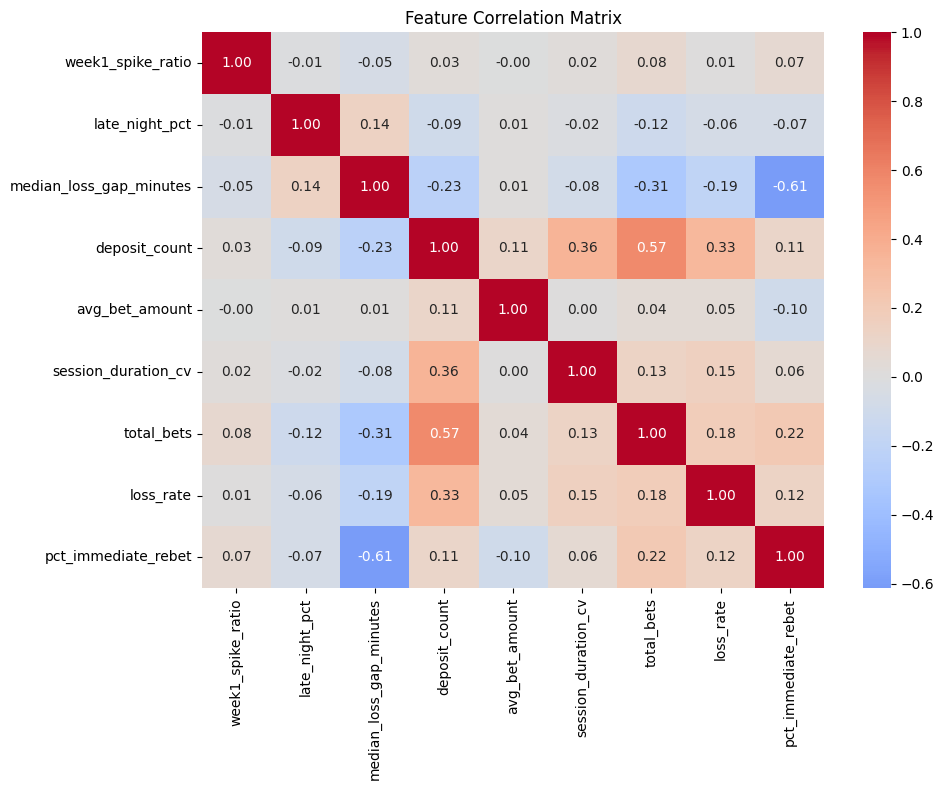

In [24]:

# Check for multicollinearity
import seaborn as sns

# Select key features for correlation analysis
key_features = ['week1_spike_ratio', 'late_night_pct', 'median_loss_gap_minutes', 
                'deposit_count', 'avg_bet_amount', 'session_duration_cv',
                'total_bets', 'loss_rate', 'pct_immediate_rebet']

available_features = [f for f in key_features if f in feature_df.columns]

plt.figure(figsize=(10, 8))
correlation_matrix = feature_df[available_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Looking for features that might be redundant
high_corr_pairs = []
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.index[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nHighly correlated features (>0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} <-> {feat2}: {corr:.2f}")